In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets, transforms

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.5.1+cu121
torchvision version: 0.20.1+cu121


In [80]:
mean = [0.4914, 0.4822, 0.4465]
std  = [0.2470, 0.2435, 0.2616]

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=mean,
        std=std
    )
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.4914, 0.4822, 0.4465],
        std=[0.2470, 0.2435, 0.2616]
    )
])

train_data = datasets.CIFAR10(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=train_transform, # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.CIFAR10(
    root="data",
    train=False, # get test data
    download=True,
    transform=train_transform
)

Files already downloaded and verified
Files already downloaded and verified


In [81]:
image, label = train_data[0]
image, label

(tensor([[[-1.0527e+00, -1.3068e+00, -1.1956e+00,  ...,  5.1906e-01,
            4.2380e-01,  3.6029e-01],
          [-1.7354e+00, -1.9895e+00, -1.7037e+00,  ..., -3.6628e-02,
           -1.0013e-01, -5.2505e-02],
          [-1.5926e+00, -1.7354e+00, -1.2115e+00,  ..., -1.1601e-01,
           -8.4258e-02, -2.5890e-01],
          ...,
          [ 1.3129e+00,  1.2018e+00,  1.1541e+00,  ...,  5.5081e-01,
           -1.1004e+00, -1.1480e+00],
          [ 8.6835e-01,  7.5721e-01,  9.6361e-01,  ...,  9.3186e-01,
           -4.4942e-01, -6.7170e-01],
          [ 8.2072e-01,  6.7783e-01,  8.5247e-01,  ...,  1.4399e+00,
            4.0792e-01, -3.6628e-02]],
 
         [[-9.8178e-01, -1.2395e+00, -1.2072e+00,  ...,  1.4557e-01,
            3.2838e-02,  1.6733e-02],
          [-1.6582e+00, -1.9803e+00, -1.8514e+00,  ..., -5.6305e-01,
           -6.4357e-01, -5.7915e-01],
          [-1.5938e+00, -1.8676e+00, -1.5455e+00,  ..., -6.2747e-01,
           -6.2747e-01, -8.0462e-01],
          ...,
    

In [ ]:
image.shape

torch.Size([3, 32, 32])

In [83]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [84]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(50000, 50000, 10000, 10000)

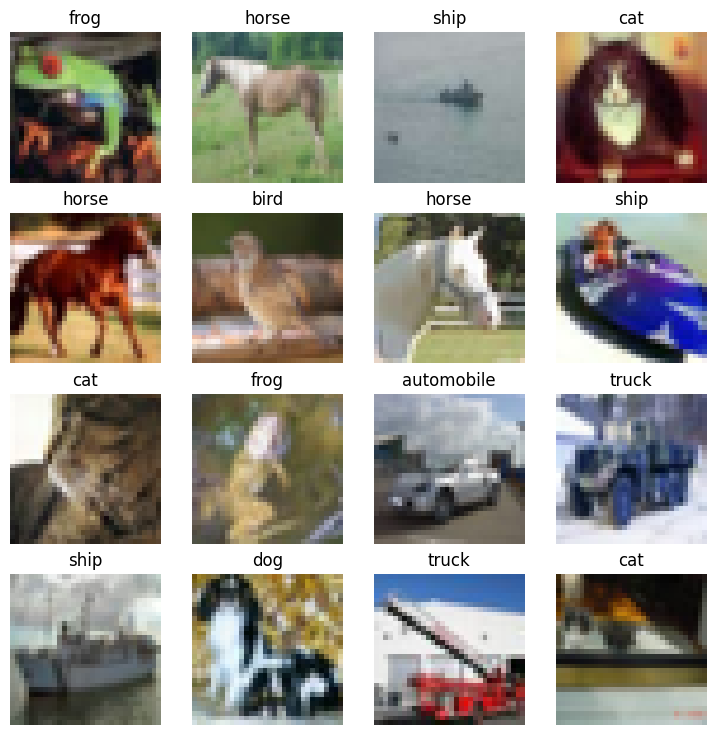

In [85]:
# plt.imshow(image.squeeze(), cmap="gray") # image shape is [1, 28, 28] (colour channels, height, width)
# plt.title(class_names[label]);


# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    mean = torch.tensor([0.4914, 0.4822, 0.4465]).view(3,1,1)
    std  = torch.tensor([0.2470, 0.2435, 0.2616]).view(3,1,1)
    img = img * std + mean   # unnormalize
    plt.imshow(img.permute(1, 2, 0))
    plt.title(class_names[label])
    plt.axis(False);

In [86]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(
    train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001E433EF1B10>, <torch.utils.data.dataloader.DataLoader object at 0x000001E468059250>)
Length of train dataloader: 1563 batches of 32
Length of test dataloader: 313 batches of 32


In [87]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

In [88]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([3, 32, 32]) -> [color_channels, height, width]
Shape after flattening: torch.Size([3, 1024]) -> [color_channels, height*width]


In [89]:
# Create a model with non-linear and linear layers
class ModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [90]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [91]:
torch.manual_seed(42)
model_1 = ModelV1(input_shape=3072, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cuda', index=0)

In [92]:
model = model_1
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [93]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [94]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [95]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [96]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [97]:
from tqdm import tqdm

# Measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()
model = model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.94835 | Train accuracy: 32.20%


 33%|███▎      | 1/3 [00:07<00:14,  7.07s/it]

Test loss: 2.02859 | Test accuracy: 30.41%

Epoch: 1
---------
Train loss: 1.89339 | Train accuracy: 34.73%


 67%|██████▋   | 2/3 [00:14<00:07,  7.09s/it]

Test loss: 1.90990 | Test accuracy: 34.72%

Epoch: 2
---------
Train loss: 1.87551 | Train accuracy: 35.56%


100%|██████████| 3/3 [00:21<00:00,  7.19s/it]

Test loss: 2.07142 | Test accuracy: 33.77%

Train time on cuda: 21.558 seconds


In [98]:
# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(
                        model=model_1,
                        data_loader=test_dataloader,
                        loss_fn=loss_fn,
                        accuracy_fn=accuracy_fn,
                        device=device
)
model_1_results

{'model_name': 'ModelV1',
 'model_loss': 2.0714151859283447,
 'model_acc': 33.76597444089457}

In [99]:
class ModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
                            nn.Conv2d(in_channels=input_shape,
                                    out_channels=hidden_units,
                                    kernel_size=3, # how big is the square that's going over the image?
                                    stride=1, # default
                                    padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
                            nn.ReLU(),
                            nn.Conv2d(in_channels=hidden_units,
                                    out_channels=hidden_units,
                                    kernel_size=3,
                                    stride=1,
                                    padding=1),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=2,
                                        stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
                            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
                            nn.ReLU(),
                            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
                            nn.ReLU(),
                            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*8*8,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [100]:
model_2 = ModelV2(
            input_shape=3,
            hidden_units=10,
            output_shape=len(class_names)
        ).to(device)
model_2

ModelV2(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=640, out_features=10, bias=True)
  )
)

In [101]:
model = model_2
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                             lr=0.1)

In [102]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.68078 | Train accuracy: 39.21%


 10%|█         | 1/10 [00:07<01:11,  7.96s/it]

Test loss: 1.60045 | Test accuracy: 43.55%

Epoch: 1
---------
Train loss: 1.29761 | Train accuracy: 53.90%


 20%|██        | 2/10 [00:15<01:02,  7.84s/it]

Test loss: 1.37229 | Test accuracy: 52.14%

Epoch: 2
---------
Train loss: 1.17913 | Train accuracy: 58.57%


 30%|███       | 3/10 [00:23<00:56,  8.02s/it]

Test loss: 1.17697 | Test accuracy: 59.09%

Epoch: 3
---------
Train loss: 1.12724 | Train accuracy: 60.51%


 40%|████      | 4/10 [00:33<00:50,  8.45s/it]

Test loss: 1.18475 | Test accuracy: 58.77%

Epoch: 4
---------
Train loss: 1.09739 | Train accuracy: 61.72%


 50%|█████     | 5/10 [00:41<00:41,  8.28s/it]

Test loss: 1.14850 | Test accuracy: 60.32%

Epoch: 5
---------
Train loss: 1.08256 | Train accuracy: 61.99%


 60%|██████    | 6/10 [00:49<00:32,  8.21s/it]

Test loss: 1.14230 | Test accuracy: 61.08%

Epoch: 6
---------
Train loss: 1.06791 | Train accuracy: 62.82%


 70%|███████   | 7/10 [00:58<00:25,  8.51s/it]

Test loss: 1.16186 | Test accuracy: 60.04%

Epoch: 7
---------
Train loss: 1.05618 | Train accuracy: 63.01%


 80%|████████  | 8/10 [01:07<00:17,  8.67s/it]

Test loss: 1.21750 | Test accuracy: 57.66%

Epoch: 8
---------
Train loss: 1.05142 | Train accuracy: 63.04%


 90%|█████████ | 9/10 [01:15<00:08,  8.62s/it]

Test loss: 1.09341 | Test accuracy: 61.78%

Epoch: 9
---------
Train loss: 1.05041 | Train accuracy: 63.59%


100%|██████████| 10/10 [01:23<00:00,  8.35s/it]

Test loss: 1.07194 | Test accuracy: 62.69%

Train time on cuda: 83.543 seconds


In [103]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'ModelV2',
 'model_loss': 1.0719380378723145,
 'model_acc': 62.689696485623}

In [104]:
class AlexNetCIFAR(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()

        self.features = nn.Sequential(
            # Conv 1
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv 2
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv 3
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            # Conv 4
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            # Conv 5
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),

            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [105]:
model_3 = AlexNetCIFAR(
            num_classes=len(class_names)
        ).to(device)
model_3

AlexNetCIFAR(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p

In [ ]:
# Setup loss and optimizer specifically for model_3
loss_fn_3 = nn.CrossEntropyLoss()
optimizer_3 = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_3 = timer()

# Train and test model
epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_3,
        loss_fn=loss_fn_3,
        optimizer=optimizer_3,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_3,
        loss_fn=loss_fn_3,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_3 = timer()
total_train_time_model_3 = print_train_time(start=train_time_start_model_3,
                                           end=train_time_end_model_3,
                                           device=device)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.63614 | Train accuracy: 77.92%


 10%|█         | 1/10 [00:15<02:15, 15.04s/it]

Test loss: 0.87832 | Test accuracy: 70.66%

Epoch: 1
---------
Train loss: 0.48210 | Train accuracy: 83.11%


 20%|██        | 2/10 [00:30<02:04, 15.55s/it]

Test loss: 0.80065 | Test accuracy: 73.39%

Epoch: 2
---------
Train loss: 0.35145 | Train accuracy: 87.60%


 30%|███       | 3/10 [00:43<01:40, 14.30s/it]

Test loss: 0.76021 | Test accuracy: 77.22%

Epoch: 3
---------
Train loss: 0.27416 | Train accuracy: 90.36%


 40%|████      | 4/10 [00:59<01:28, 14.80s/it]

Test loss: 0.68084 | Test accuracy: 79.47%

Epoch: 4
---------
Train loss: 0.19256 | Train accuracy: 93.31%


 50%|█████     | 5/10 [01:14<01:14, 14.84s/it]

Test loss: 0.81972 | Test accuracy: 78.06%

Epoch: 5
---------
Train loss: 0.14830 | Train accuracy: 94.97%


 60%|██████    | 6/10 [01:29<00:59, 14.85s/it]

Test loss: 0.88862 | Test accuracy: 78.36%

Epoch: 6
---------
Train loss: 0.11858 | Train accuracy: 95.97%


 70%|███████   | 7/10 [01:43<00:44, 14.86s/it]

Test loss: 0.98042 | Test accuracy: 77.45%

Epoch: 7
---------
Train loss: 0.10792 | Train accuracy: 96.43%


 80%|████████  | 8/10 [01:58<00:29, 14.86s/it]

Test loss: 0.94706 | Test accuracy: 79.69%

Epoch: 8
---------
Train loss: 0.08513 | Train accuracy: 97.22%


 90%|█████████ | 9/10 [02:13<00:14, 14.87s/it]

Test loss: 1.03031 | Test accuracy: 78.20%

Epoch: 9
---------
Train loss: 0.06940 | Train accuracy: 97.81%


100%|██████████| 10/10 [02:28<00:00, 14.87s/it]

Test loss: 1.06072 | Test accuracy: 79.38%

Train time on cuda: 148.656 seconds


In [115]:
# Get model_3 results
model_3_results = eval_model(
    model=model_3,
    data_loader=test_dataloader,
    loss_fn=loss_fn_3,
    accuracy_fn=accuracy_fn
)
model_3_results


{'model_name': 'AlexNetCIFAR',
 'model_loss': 1.060719609260559,
 'model_acc': 79.38298722044729}

In [129]:
# Setup loss and optimizer specifically for model_3
loss_fn_3_ADAM = nn.CrossEntropyLoss()
optimizer_3_ADAM = torch.optim.Adam(params=model_3.parameters(), lr=0.001)

torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_3_ADAM = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model_3,
        loss_fn=loss_fn_3_ADAM,
        optimizer=optimizer_3_ADAM,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_3,
        loss_fn=loss_fn_3_ADAM,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_3_ADAM = timer()
total_train_time_model_3_ADAM = print_train_time(start=train_time_start_model_3_ADAM,
                                           end=train_time_end_model_3_ADAM,
                                           device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.55897 | Train accuracy: 81.77%


 20%|██        | 1/5 [00:31<02:07, 31.87s/it]

Test loss: 0.81737 | Test accuracy: 75.39%

Epoch: 1
---------
Train loss: 0.47845 | Train accuracy: 84.17%


 40%|████      | 2/5 [00:59<01:28, 29.63s/it]

Test loss: 0.82017 | Test accuracy: 76.13%

Epoch: 2
---------
Train loss: 0.41370 | Train accuracy: 86.30%


 60%|██████    | 3/5 [01:27<00:57, 28.77s/it]

Test loss: 0.88437 | Test accuracy: 76.32%

Epoch: 3
---------
Train loss: 0.36788 | Train accuracy: 88.15%


 80%|████████  | 4/5 [02:03<00:31, 31.60s/it]

Test loss: 0.83092 | Test accuracy: 77.70%

Epoch: 4
---------
Train loss: 0.30861 | Train accuracy: 89.90%


100%|██████████| 5/5 [02:39<00:00, 31.89s/it]

Test loss: 0.88424 | Test accuracy: 78.52%

Train time on cuda: 159.461 seconds


In [130]:
# Get model_3 results
model_3_results_ADAM = eval_model(
    model=model_3,
    data_loader=test_dataloader,
    loss_fn=loss_fn_3_ADAM,
    accuracy_fn=accuracy_fn
)
model_3_results_ADAM


{'model_name': 'AlexNetCIFAR',
 'model_loss': 0.8842365741729736,
 'model_acc': 78.52436102236422}

In [116]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [117]:
def plot_predictions(model: torch.nn.Module,
                     test_samples: list,
                     test_labels: list,
                     class_names: list,
                     title: str = None,
                     nrows: int = 3,
                     ncols: int = 3):
    """Makes predictions and plots results vs ground truth for a grid of test samples.

    Args:
        model (torch.nn.Module): Trained model to make predictions with.
        test_samples (list): List of image tensors to predict on.
        test_labels (list): Ground-truth label indices.
        class_names (list): List of class name strings.
        title (str, optional): Overall figure title. Defaults to None.
        nrows (int): Number of subplot rows. Defaults to 3.
        ncols (int): Number of subplot columns. Defaults to 3.

    Returns:
        torch.Tensor: Predicted class indices.
    """
    pred_probs = make_predictions(model=model, data=test_samples)
    pred_classes = pred_probs.argmax(dim=1)

    mean = torch.tensor([0.4914, 0.4822, 0.4465]).view(3, 1, 1)
    std  = torch.tensor([0.2470, 0.2435, 0.2616]).view(3, 1, 1)

    plt.figure(figsize=(9, 9))
    if title:
        plt.suptitle(title, fontsize=14, fontweight="bold")

    for i, sample in enumerate(test_samples):
        plt.subplot(nrows, ncols, i + 1)
        img = sample * std + mean          # unnormalize
        plt.imshow(img.permute(1, 2, 0))

        pred_label  = class_names[pred_classes[i]]
        truth_label = class_names[test_labels[i]]
        title_text  = f"Pred: {pred_label} | Truth: {truth_label}"
        color = "g" if pred_label == truth_label else "r"
        plt.title(title_text, fontsize=10, c=color)
        plt.axis(False)

    plt.tight_layout()
    plt.show()
    return pred_classes


In [122]:
from tqdm.auto import tqdm
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

def plot_confusion_matrix_for_model(model: torch.nn.Module,
                                    dataloader: torch.utils.data.DataLoader,
                                    class_names: list,
                                    device: torch.device = device,
                                    title: str = None,
                                    figsize: tuple = (10, 7)):
    """Generates predictions over a full dataloader and plots the confusion matrix.

    Args:
        model (torch.nn.Module): Trained model to evaluate.
        dataloader (torch.utils.data.DataLoader): DataLoader to run inference on.
        class_names (list): List of class name strings for axis labels.
        device (torch.device): Device to run inference on. Defaults to device.
        title (str, optional): Title for the confusion matrix plot. Defaults to None.
        figsize (tuple): Figure size for the plot. Defaults to (10, 7).

    Returns:
        torch.Tensor: The (num_classes x num_classes) confusion matrix tensor.
    """
    y_preds = []
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(dataloader, desc=f"Making predictions{' for ' + title if title else ''}"):
            X, y = X.to(device), y.to(device)
            y_logit = model(X)
            y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
            y_preds.append(y_pred.cpu())

    y_pred_tensor = torch.cat(y_preds)

    confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
    confmat_tensor = confmat(preds=y_pred_tensor,
                             target=torch.tensor(dataloader.dataset.targets))

    fig, ax = plot_confusion_matrix(
        conf_mat=confmat_tensor.numpy(),
        class_names=class_names,
        figsize=figsize
    )
    if title:
        ax.set_title(title, fontsize=14, fontweight="bold")
    plt.show()

    return confmat_tensor


In [124]:
import random
random.seed(67)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([3, 32, 32])
Test sample label: 6 (frog)


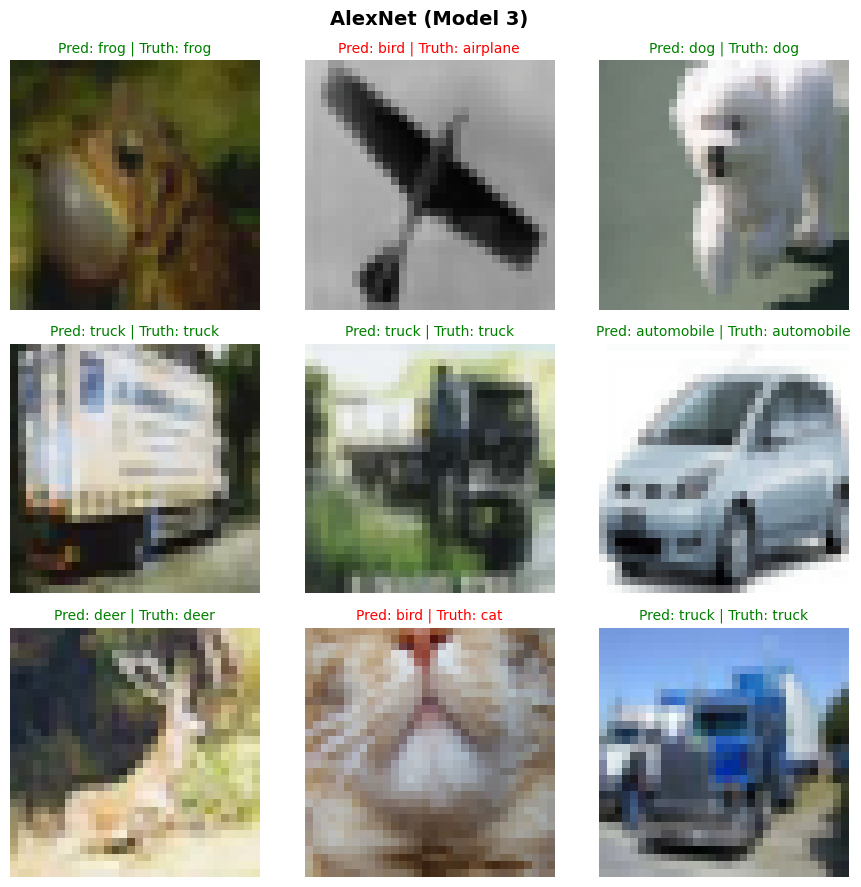

Predicted: [6, 2, 5, 9, 9, 1, 4, 2, 9]
Truth:     [6, 0, 5, 9, 9, 1, 4, 3, 9]


In [125]:
# AlexNet (Model 3) predictions
pred_classes_3 = plot_predictions(
    model=model_3,
    test_samples=test_samples,
    test_labels=test_labels,
    class_names=class_names,
    title="AlexNet (Model 3)"
)
print("Predicted:", pred_classes_3.tolist())
print("Truth:    ", test_labels)


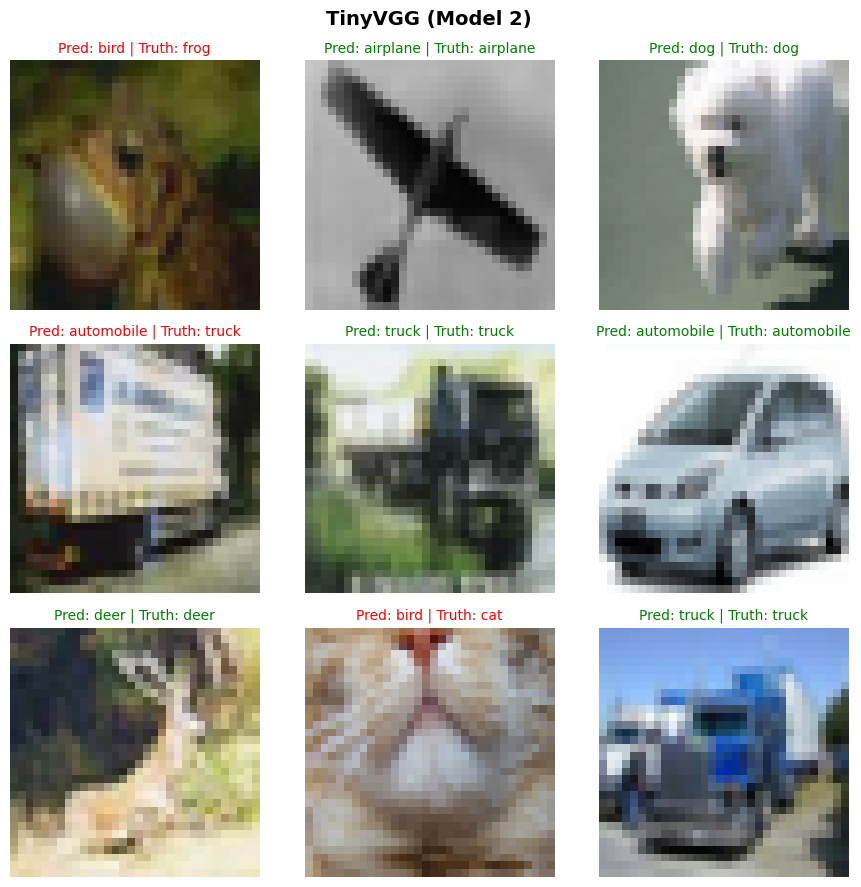

Predicted: [2, 0, 5, 1, 9, 1, 4, 2, 9]
Truth:     [6, 0, 5, 9, 9, 1, 4, 3, 9]


In [126]:
# TinyVGG (Model 2) predictions
pred_classes_2 = plot_predictions(
    model=model_2,
    test_samples=test_samples,
    test_labels=test_labels,
    class_names=class_names,
    title="TinyVGG (Model 2)"
)
print("Predicted:", pred_classes_2.tolist())
print("Truth:    ", test_labels)


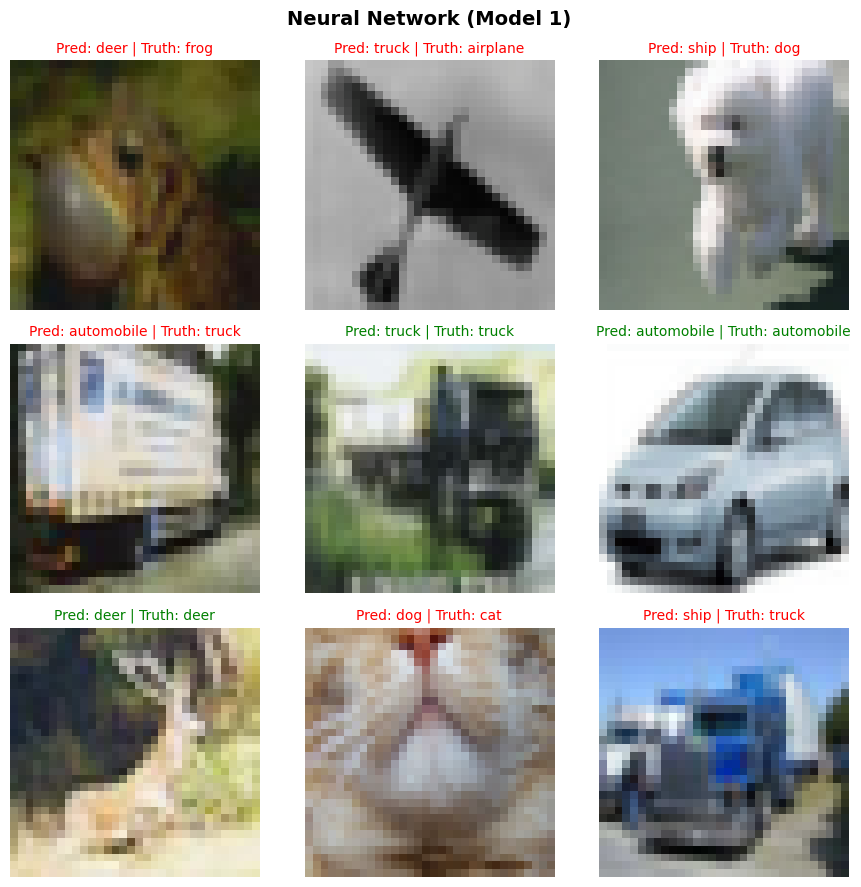

Predicted: [4, 9, 8, 1, 9, 1, 4, 5, 8]
Truth:     [6, 0, 5, 9, 9, 1, 4, 3, 9]


In [127]:
# TinyVGG (Model 2) predictions
pred_classes_1 = plot_predictions(
    model=model_1,
    test_samples=test_samples,
    test_labels=test_labels,
    class_names=class_names,
    title="Neural Network (Model 1)"
)
print("Predicted:", pred_classes_1.tolist())
print("Truth:    ", test_labels)

Making predictions for ModelV1 (Linear) – Confusion Matrix: 100%|██████████| 313/313 [00:00<00:00, 337.52it/s]


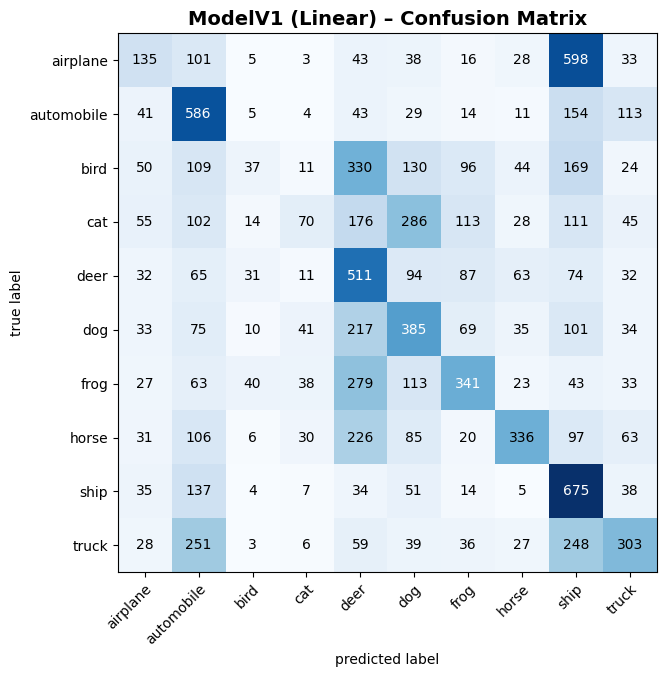

Making predictions for TinyVGG (Model 2) – Confusion Matrix: 100%|██████████| 313/313 [00:01<00:00, 269.23it/s]


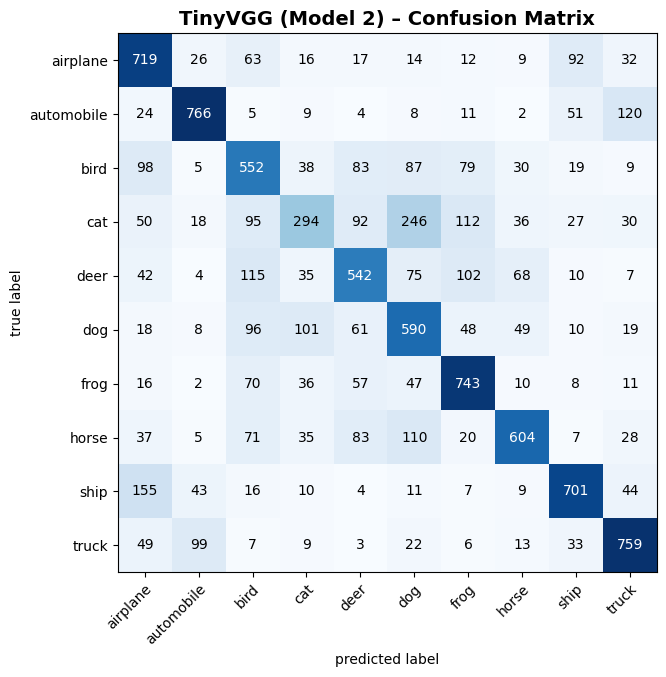

Making predictions for AlexNet (Model 3) – Confusion Matrix: 100%|██████████| 313/313 [00:01<00:00, 186.10it/s]


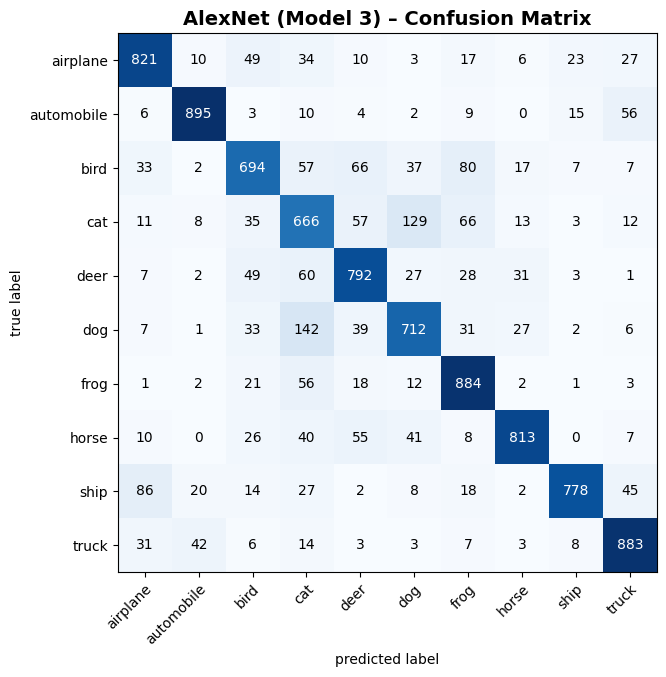

In [ ]:
# Confusion matrices for all three models
confmat_1 = plot_confusion_matrix_for_model(
    model=model_1, dataloader=test_dataloader,
    class_names=class_names, title="ModelV1 (Linear) – Confusion Matrix"
)

confmat_2 = plot_confusion_matrix_for_model(
    model=model_2, dataloader=test_dataloader,
    class_names=class_names, title="TinyVGG (Model 2) – Confusion Matrix"
)

confmat_3 = plot_confusion_matrix_for_model(
    model=model_3, dataloader=test_dataloader,
    class_names=class_names, title="AlexNet (Model 3) – Confusion Matrix"
)